In [159]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data= pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

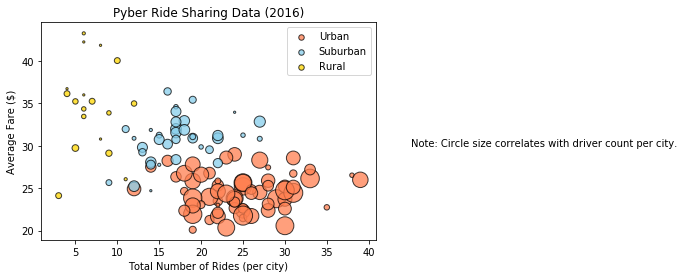

In [160]:
# Obtain the x and y coordinates for each of the three city types
urban_city= pyber_data.loc[pyber_data["type"]=="Urban"]
suburban_city= pyber_data.loc[pyber_data["type"]=="Suburban"]
rural_city= pyber_data.loc[pyber_data["type"]=="Rural"]

#Calculate number of rides per city (x axis)
urban_rides= urban_city.groupby(urban_city["city"])["ride_id"].count()
suburban_rides= suburban_city.groupby(suburban_city["city"])["ride_id"].count()
rural_rides= rural_city.groupby(rural_city["city"])["ride_id"].count()
    
#Calculate the average fare per city (y axis)
urban_avg_fare= urban_city.groupby(urban_city["city"])["fare"].mean()
suburban_avg_fare= suburban_city.groupby(suburban_city["city"])["fare"].mean()
rural_avg_fare= rural_city.groupby(rural_city["city"])["fare"].mean()

#Calculate the number of drivers per city (bubble size)
urban_drivers= urban_city.groupby(["city"])["driver_count"].mean()
suburban_drivers= suburban_city.groupby(["city"])["driver_count"].mean()
rural_drivers= rural_city.groupby(["city"])["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_avg_fare, s= urban_drivers*5, c= "coral", marker= "o", alpha= 0.75, edgecolor= "black")
plt.scatter(suburban_rides, suburban_avg_fare, s= suburban_drivers*5, c= "skyblue", marker= "o", alpha= 0.75, edgecolor= "black")
plt.scatter(rural_rides, rural_avg_fare, s= rural_drivers*5, c= "gold", marker= "o", alpha= 0.75, edgecolor= "black")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

# Create a legend
    #Use legend handle to control size, use legend index
lgnd= plt.legend(labels= ("Urban", "Suburban", "Rural"), loc="best")
lgnd.legendHandles[0]._sizes= [30]
lgnd.legendHandles[1]._sizes= [30]
lgnd.legendHandles[2]._sizes= [30]

# Incorporate a text label regarding circle size
text_label= "Note: Circle size correlates with driver count per city."
plt.text(45,30,text_label, fontsize=10) 

# Save Figure
    #...,bbox_inches=tight
plt.savefig("../Images/Pyber_scatterplot.png", bbox_inches= "tight") 

In [161]:
# Show plot
plt.show()

## Total Fares by City Type

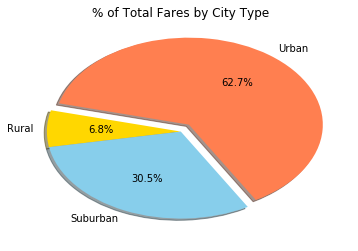

In [169]:
# Calculate Type Percents
group_totals= pyber_data.groupby("type").sum()
urban_fares= group_totals.iloc[2,1]
suburban_fares= group_totals.iloc[1,1]
rural_fares= group_totals.iloc[0,1]


# Build Pie Chart
fare_sizes= [urban_fares, rural_fares, suburban_fares]
colors= ["coral","gold", "skyblue"]
fare_labels= ["Urban", "Rural", "Suburban"]
explode= (0.1,0,0)
plt.pie(sizes, explode=explode, labels=fare_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/fares_piechart.png")

In [163]:
# Show Figure
plt.show()

## Total Rides by City Type

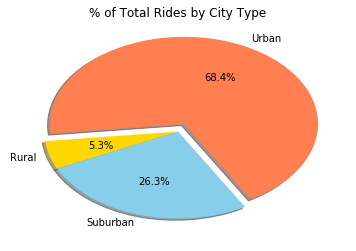

In [164]:
# Calculate Ride Percents
ride_count= pyber_data.groupby(["type"])["ride_id"].count()
urban_rides_pie= ride_count.iloc[2]
rural_rides_pie= ride_count.iloc[0]
suburban_rides_pie= ride_count.iloc[1]

# Build Pie Chart
ride_sizes=[urban_rides_pie, rural_rides_pie, suburban_rides_pie]
ride_labels= ["Urban", "Rural", "Suburban"]
plt.pie(ride_sizes, explode=explode, labels=ride_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/rides_piechart.png")

In [165]:
# Show Figure
plt.show()

## Total Drivers by City Type

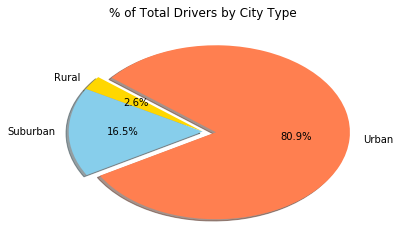

In [166]:
# Calculate Driver Percents
drivers_citytype= pyber_data.groupby(["city", "type"])["driver_count"].mean()
driver_citytype_df= drivers_citytype.groupby(["type"]).sum()
pie_urban_drivers= driver_citytype_df[2]
pie_suburban_drivers= driver_citytype_df[1]
pie_rural_drivers= driver_citytype_df[0]

# Build Pie Charts
driver_sizes= [pie_urban_drivers, pie_rural_drivers, pie_suburban_drivers]
driver_labels= ["Urban", "Rural", "Suburban"]
plt.pie(driver_sizes, explode=explode, labels=driver_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=210)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/drivers_piechart.png")

In [167]:
# Show Figure
plt.show()

THREE STRATEGIES FOR MARKET DIFFERENTIATION:

1) There is potential for growth in the rural market. Currently, rural rides make up only 5.3% of total rides for Pyber. Growth in this market would be exciting because on average rural fares are higher due to longer distance traveled. Pyber could differentiate itself from its competitors in this market by catering to rural needs. We could offer more vehicles with towing capability, offer parts/supplies delivery services, and make the rides more comfortable for long distances.

2) Pyber needs to increase the number of drivers in our suburban cities. Right now they make up 16.5% of our drivers and yet make up 30.5% of our fares. If we can increase the number of drivers in this sector we can grab more of these high to mid-level fares.

3) Most of our drivers operate in Urban city types. With such a large concentration of drivers, Pyber could set itself apart from its competition by enabling an easy, one-tap "Hail Pyber" button on its app for quick response of the nearest Pyber driver. Fares are typically low in urban cities so this would allow drivers to get the high numbers they need to make Pyber a viable source of income. It also allows our customers quick access to transportation with no entry of destination prior to hailing Pyber. Destination is relayed upon entry to Pyber reminiscient of traditional hailing of a cab.

